# Deforestation Analysis using Color Segmentation

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
plt.rcParams['image.cmap'] = 'gray'

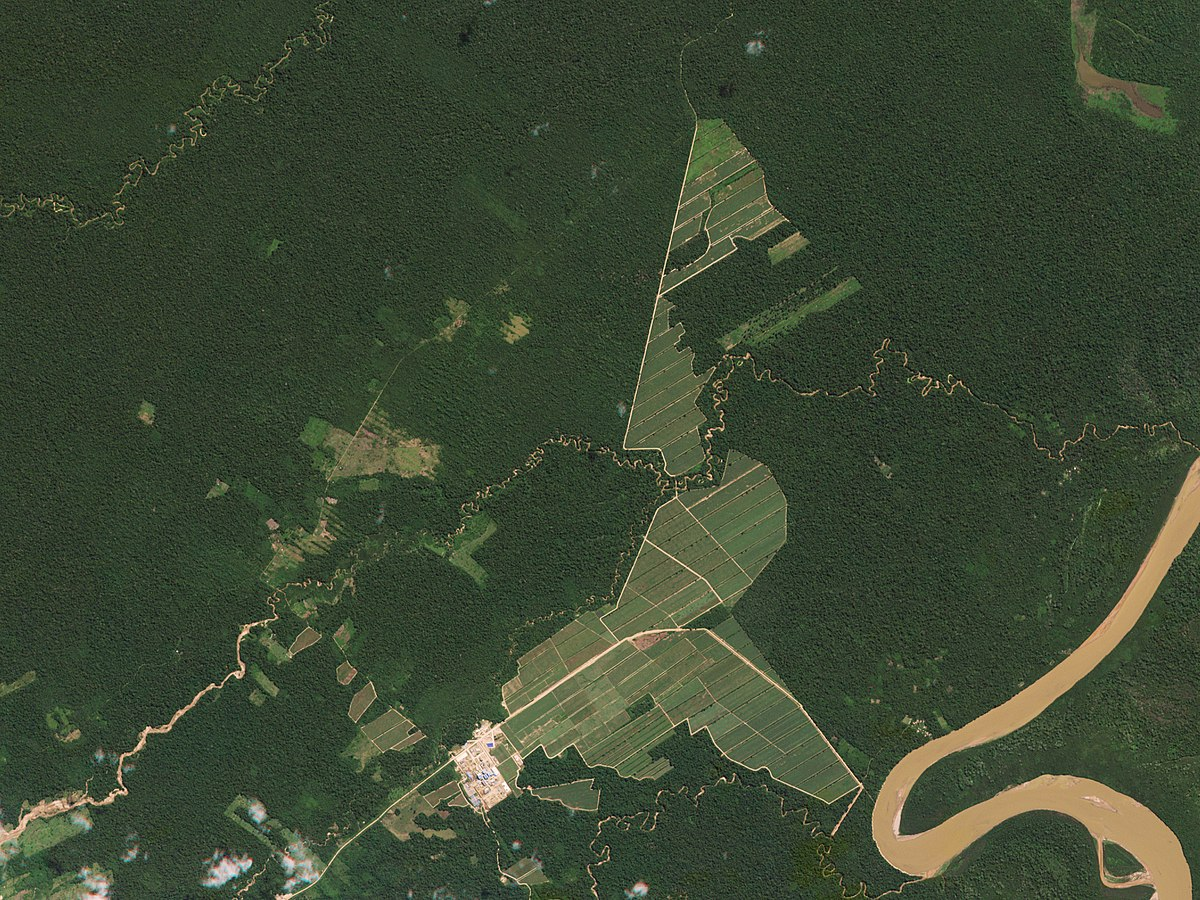

In [15]:
Image('forest.jpeg', width=500)

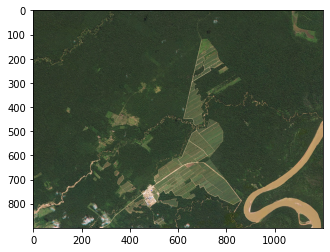

In [18]:
img = cv2.imread('forest.jpeg', cv2.IMREAD_COLOR)
plt.imshow(img[:,:,::-1])

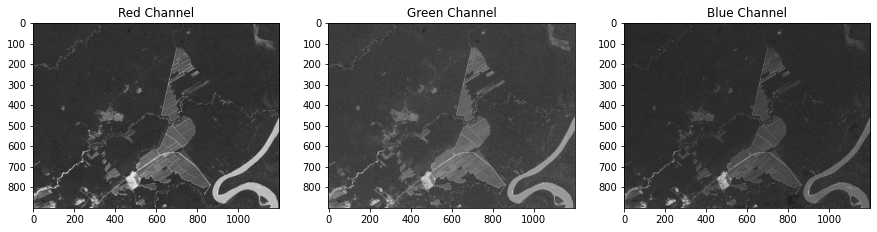

In [21]:
# SPLIT the channel
b, g, r = cv2.split(img)
plt.figure(figsize=(15, 8))
plt.subplot(131); plt.imshow(r); plt.title('Red Channel')
plt.subplot(132); plt.imshow(g); plt.title('Green Channel')
plt.subplot(133); plt.imshow(b); plt.title('Blue Channel')
plt.show()

In [26]:
def draw_image_histogram_bgr(image, title='', yscale='linear'):
    histB = cv2.calcHist([image], [0], None, [256], [0, 255])
    histG = cv2.calcHist([image], [1], None, [256], [0, 255])
    histR = cv2.calcHist([image], [2], None, [256], [0, 255])
    
    fig = plt.figure(figsize = [20, 5])
    fig.suptitle(title)
    
    ax = fig.add_subplot(1, 3, 1)
    ax.set_yscale(yscale)
    plt.plot(histB, color = 'b', label = 'Blue')
    ax.grid()
    ax.legend()
    
    ax = fig.add_subplot(1, 3, 2)
    ax.set_yscale(yscale)
    plt.plot(histG, color = 'g', label = 'Green')
    ax.grid()
    ax.legend()
    
    ax = fig.add_subplot(1, 3, 3)
    ax.set_yscale(yscale)
    plt.plot(histR, color = 'r', label = 'Red')
    ax.grid()
    ax.legend()
    plt.show()

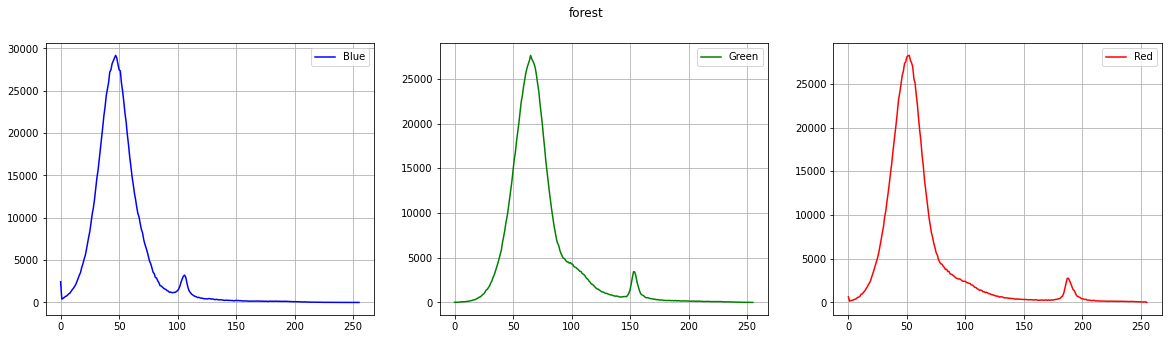

In [30]:
draw_image_histogram_bgr(img, title='forest', yscale='linear')

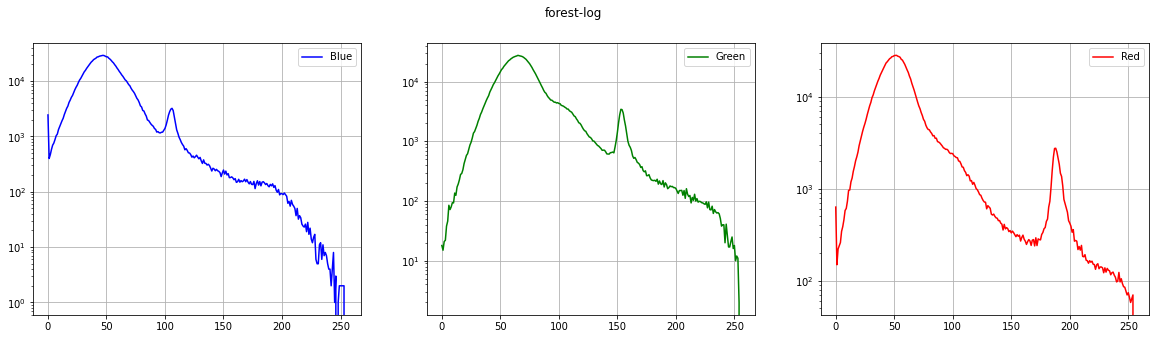

In [32]:
draw_image_histogram_bgr(img, title='forest-log', yscale='log')

### Color Segmentation using inRange

In [33]:
def detect_green_BGR(image):
    lower_bgr_value = np.array([0 , 50, 0])
    upper_bgr_value = np.array([255 , 100, 255])
    
    mask_BGR = cv2.inRange(image, lower_bgr_value, upper_bgr_value)
    return mask_BGR

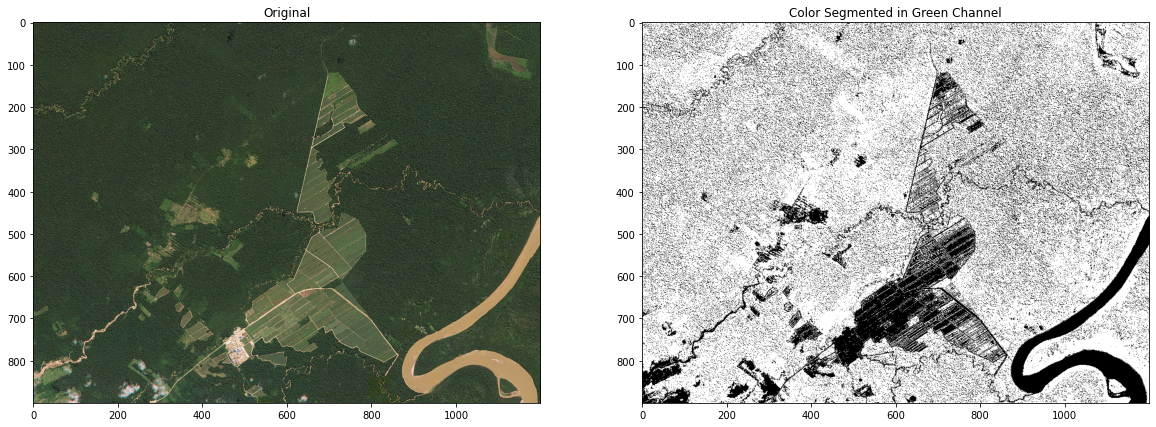

In [35]:
segmented_green = detect_green_BGR(img)

fig = plt.figure(figsize = (20, 10))

ax = fig.add_subplot(1, 2, 1)
plt.imshow(img[:, :, ::-1])
ax.set_title('Original')

ax = fig.add_subplot(1, 2, 2)
plt.imshow(segmented_green, cmap = 'gray')
ax.set_title('Color Segmented in Green Channel')

plt.show()

### Find percentage of non-zero pixels

In [44]:
def percentage_forest(mask_image):
    c = cv2.countNonZero(mask_image)
    return round(c / (mask_image.shape[0] * mask_image.shape[1] / 100), 2)

In [45]:
percentage_forest(segmented_green)

75.14

## Check in HSV color space

In [46]:
def draw_image_histogram_hsv(image, title = '', yscale = 'linear'):
    """Utility to plot histograms for the hue, saturation, value channels independently."""
    HSV_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    histH = cv2.calcHist([HSV_image], [0], None, [180], [0, 179])
    histS = cv2.calcHist([HSV_image], [1], None, [256], [0, 255])
    histV = cv2.calcHist([HSV_image], [2], None, [256], [0, 255])
    
    # Plot the histograms for each channel.
    fig = plt.figure(figsize = [20, 5])
    fig.suptitle(title)
    
    ax = fig.add_subplot(1, 3, 1)
    ax.set_yscale(yscale)
    plt.plot(histH, color = 'b', label = 'Hue')
    ax.grid()
    ax.legend()
    
    ax = fig.add_subplot(1, 3, 2)
    ax.set_yscale(yscale)
    plt.plot(histS, color = 'g', label = 'Saturation')
    ax.grid()
    ax.legend()
    
    ax = fig.add_subplot(1, 3, 3)
    ax.set_yscale(yscale)
    plt.plot(histV, color = 'r', label = 'Value')
    ax.grid()
    ax.legend()
    
    plt.show()

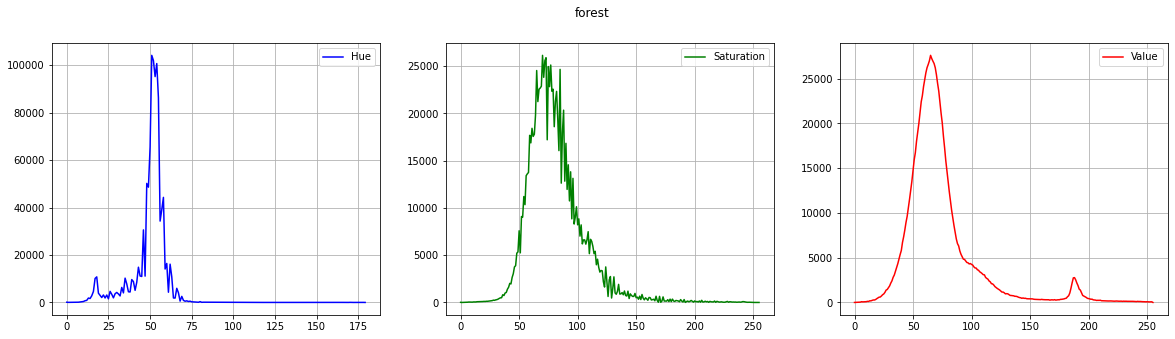

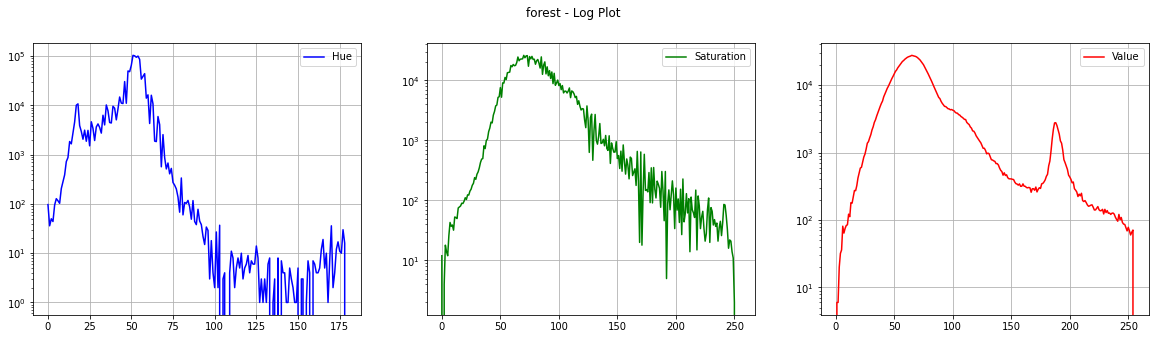

In [47]:
# Display the Linear plots
draw_image_histogram_hsv(img, 'forest')

# Display the Log plots
draw_image_histogram_hsv(img, 'forest - Log Plot','log')

In [48]:
def detect_green_HSV(img):
    """Detect and return a mask for the green area of an image using HSV segmentation."""
    HSV_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    lower_HSV_values = np.array([36, 0, 50], dtype = 'uint8')
    upper_HSV_values = np.array([86, 250, 100], dtype = 'uint8')
    
    mask_HSV = cv2.inRange(HSV_image, lower_HSV_values, upper_HSV_values) 
    
    return mask_HSV

NameError: name 'image_file' is not defined

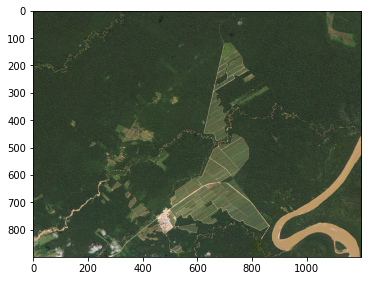

In [51]:
segmented_green_hsv = detect_green_HSV(img)
green_ratio_hsv = percentage_forest(segmented_green_hsv)

segmented_green_bgr = detect_green_BGR(img)
green_ratio_bgr = percentage_forest(segmented_green_bgr)

fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(1, 3, 1)
plt.imshow(img[:, :, ::-1])
ax.set_title('Original - ' + image_file)

ax = fig.add_subplot(1, 3, 2)
plt.imshow(segmented_green_hsv, cmap = 'gray')
ax.set_title('Color Segmented using HSV Color Space: ' + str(green_ratio_hsv) + '%')

ax = fig.add_subplot(1, 3, 3)
plt.imshow(segmented_green_bgr, cmap = 'gray')
ax.set_title('Color Segmented using BGR Color Space: ' + str(green_ratio_bgr) + '%')

plt.show()